In [1]:
# pip install yfinance

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

#### Data Preprocessing for Google Stock Price Data from Source: Yahoo Finance

In [3]:
start = '2012-01-01'
end = '2024-04-13'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [5]:
# reset index, to make date not as index
data.reset_index(inplace=True)

In [6]:
ma_100_days = data.Close.rolling(100).mean()

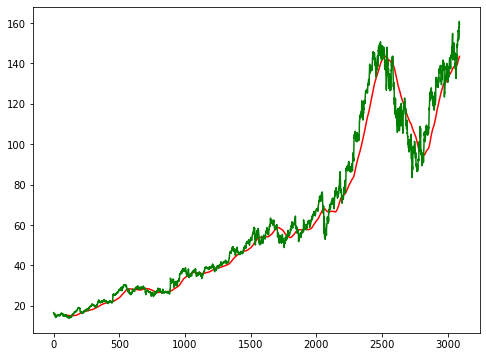

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

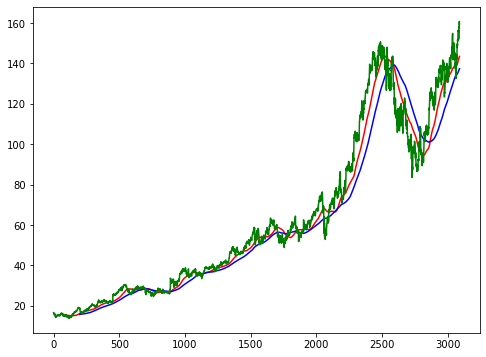

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# there are no null value, but dropna function is to drop rows that contain the null values 
data.dropna(inplace=True)

In [12]:
# 80-20 rule for Train Test split data 
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [13]:
data_train.shape[0]
# 2208 rows of Train Data 

2471

In [14]:
data_test.shape[0]
# 618 rows of Test data 

618

Data Scailing

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
# Area Slicing
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    # ex: take the first 100 data, to calculate the 101th data 
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
X, y = np.array(x), np.array(y)

In [19]:
# import the libraries 
import tensorflow as tf 
import pandas as pd 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 


#### Model Creation using LSTM (Neural Network)

In [20]:
import tensorflow as tf
from keras.layers import Dense, Dropout, LSTM 
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape= (X.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
# Dense unit=1 because we are only going to predict one value which is the 'Close' value
model.add(Dense(units = 1))

C:\Users\asusj\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 160ms/step - loss: 0.0516
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - loss: 0.0043
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - loss: 0.0063
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0039
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - loss: 0.0037
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 188ms/step - loss: 0.0034
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - loss: 0.0032
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - loss: 0.0028
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 271ms/step - loss: 0.0027
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - loss: 0.0029
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - loss: 0.0021
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 267ms/step - loss: 0.0023
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - loss: 0.0024
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - loss: 0.0028
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
y_train_predict = model.predict(X)

75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step


In [26]:
scale = 1/scaler.scale_
# To get or revive the exact or original values
y_train_predict = y_train_predict*scale
# The actual values 
y = y*scale

#### Predicting Values from Model

In [27]:
pas_100_days = data_train.tail(100)
# get the last 100 rows from the training data set 

In [28]:
# added to the testing dataset
data_test = pd.concat([pas_100_days, data_test],ignore_index=True)

In [29]:
data_test_scale = scaler.fit_transform(data_test)

In [30]:
# Area Slicing
x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    # ex: take the first 100 data, to calculate the 101th data 
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i,0])

X_test, y_test = np.array(x_test), np.array(y_test)

In [31]:
y_predict = model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


In [32]:
scale = 1/scaler.scale_

In [33]:
# To get or revive the exact or original values
y_predict = y_predict*scale

In [34]:
# The actual values 
y_test = y_test*scale

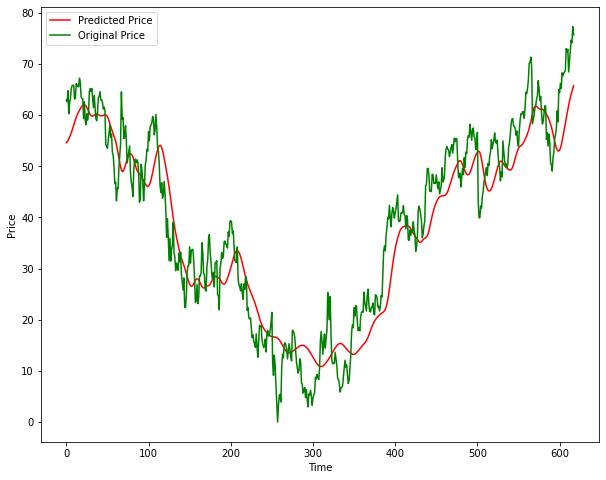

In [35]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y_test, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
# model.save('Stock Predictions Model.keras')

In [37]:
import math
from sklearn.metrics import mean_squared_error
print('Train RMSE: ', math.sqrt(mean_squared_error(y,y_train_predict)))

Train RMSE:  5.496070862899135


In [38]:
print('Test RMSE: ',math.sqrt(mean_squared_error(y_test,y_predict)))

Test RMSE:  6.291096921325047


#### The RMSE difference between Train and Test data is low, hence the model is reliable.